# MULTI-CLASS LOGISTIC REGRESSION USED TO IDENTIFTY HAND WRITTEN DIGIT  0-9

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

#importing data set of handwritten didtis from sklearn.datasets didgit is 8*8 
from sklearn.datasets import load_digits

In [2]:
# loading data in digits dataset
digits=load_digits()

In [3]:
#shows the directory which the digits dataset have
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

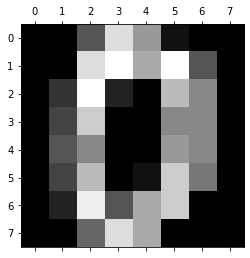

In [5]:
#plots the corresponding image using matplotlob matshow
plt.gray()
plt.matshow(digits.images[0])

#### we will use data and target to train our model

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.3)

In [8]:
len((x_train))

1257

In [9]:
len(x_test)

540

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model=LogisticRegression()

In [12]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
model.score(x_test,y_test)

0.9685185185185186

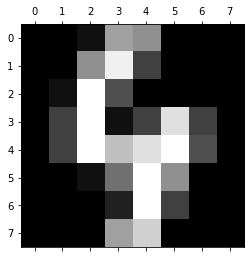

In [14]:
#random image used to check accuracy of model
plt.matshow(digits.images[111])

In [15]:
digits.target[111]

4

In [16]:
model.predict([digits.data[111]])

array([4])

In [17]:
model.predict(digits.data[0:10])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## confusion matrix to show where model is not working good

In [18]:
y_predict=model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_predict)
cm

array([[54,  1,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 49,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 54,  0,  0],
       [ 0,  1,  0,  1,  1,  1,  0,  0, 48,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  5, 54]], dtype=int64)

### To visualize confusion matrix more accurately using seaborn to plot heatmap

Text(69.0, 0.5, 'TRUTH')

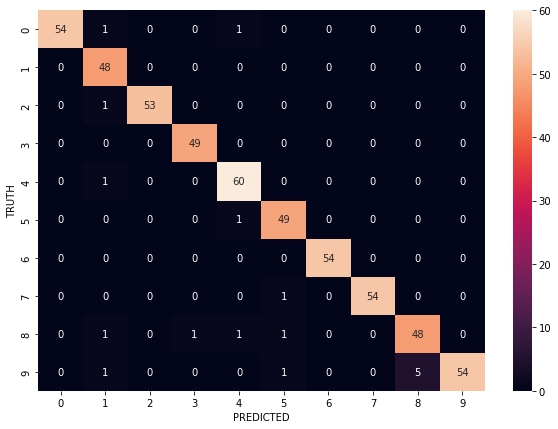

In [19]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("PREDICTED")
plt.ylabel("TRUTH")